In [ ]:
# HR Analytics Project- Understanding the Attrition in HR

In [1]:
# Problem Statement:
# Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well.
# The aim of these programs is to increase the effectiveness of their employees.
# But where HR Analytics fit in this? and is it just about improving the performance of employees?

# HR Analytics

# Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency.
# Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

# Attrition in HR

# Attrition in human resources refers to the gradual loss of employees overtime. 
# In general, relatively high attrition is problematic for companies.
# HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
# How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

# Attrition affecting Companies

# A major problem in high employee attrition is its cost to an organization.
# Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them.
# Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. 
# This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people.
# Errors and issues are more likely if you constantly have new workers.

In [2]:
# importing necessary liberaries 

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score

In [6]:
#Importing Dataset and Data Information

In [168]:
df=pd.read_csv('C:\\Users\\lenovo\\Downloads\\ibm-hr-analytics-employee-attrition-performance (1).zip')

In [169]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
# we can see top 5 rows of the dataset

In [10]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [11]:
# we can see bottom 5 rows of the dataset

In [12]:
df.shape

(1470, 35)

In [13]:
# we have total 1470 rows and 35 columns in dataset

In [14]:
# checking the columns index present in dataset
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [15]:
#Information about the data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [16]:
# here we can see 9 columns i.e Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18 and OverTime are object datatype columns and rest other 26 columns are intiger datatype

In [17]:
# Understanding Dataset

In [18]:
# Features:

#BusinessTravel
#DailyRate
#Department
#DistanceFromHome
#Education
#EducationField
#EmployeeCount
#EmployeeNumber
#EnvironmentSatisfaction
#Gender
#HourlyRate
#JobInvolvement
#JobLevel
#JobRole
#JobSatisfaction
#MaritalStatus
#MonthlyIncome
#MonthlyRate
#NumCompaniesWorked
#Over18
#OverTime
#PercentSalaryHike
#PerformanceRating
#RelationshipSatisfaction
#StandardHours
#StockOptionLevel
#TotalWorkingYears
#TrainingTimesLastYear
#WorkLifeBalance
#YearsAtCompany
#YearsInCurrentRole
#YearsSinceLastPromotion
#YearsWithCurrManager


#Target Variable:

#Attrition - the average price of a single avocado

In [19]:
# # Reviewing Data Set at initial stage, found Target variable data is 'Attrition'

In [20]:
# check for null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [21]:
# There are no null or missing values in data set

In [22]:
# check duplicated rows
df[df.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [23]:
df.duplicated().sum()

0

In [24]:
# we can see that the dataset has no duplicate rows

In [25]:
# unique values in object columns to check validity of our data
for column in df.columns:
    if df[column].dtype == object:
        print(f"{column} : {df[column].unique()} \n{df[column].value_counts()} \n ---------------------------- ")

Attrition : ['Yes' 'No'] 
No     1233
Yes     237
Name: Attrition, dtype: int64 
 ---------------------------- 
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64 
 ---------------------------- 
Department : ['Sales' 'Research & Development' 'Human Resources'] 
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64 
 ---------------------------- 
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] 
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64 
 ---------------------------- 
Gender : ['Female' 'Male'] 
Male      882
Female    588
Name: Gender, dtype: int64 
 ---------------------------- 
JobRole : ['Sales Execut

In [26]:
# unique values in non object columns to check validity of our data
for column in df.columns:
    if df[column].dtype != object:
        print(f"{column} : {df[column].min()}: {df[column].max()}")

Age : 18: 60
DailyRate : 102: 1499
DistanceFromHome : 1: 29
Education : 1: 5
EmployeeCount : 1: 1
EmployeeNumber : 1: 2068
EnvironmentSatisfaction : 1: 4
HourlyRate : 30: 100
JobInvolvement : 1: 4
JobLevel : 1: 5
JobSatisfaction : 1: 4
MonthlyIncome : 1009: 19999
MonthlyRate : 2094: 26999
NumCompaniesWorked : 0: 9
PercentSalaryHike : 11: 25
PerformanceRating : 3: 4
RelationshipSatisfaction : 1: 4
StandardHours : 80: 80
StockOptionLevel : 0: 3
TotalWorkingYears : 0: 40
TrainingTimesLastYear : 0: 6
WorkLifeBalance : 1: 4
YearsAtCompany : 0: 40
YearsInCurrentRole : 0: 18
YearsSinceLastPromotion : 0: 15
YearsWithCurrManager : 0: 17


In [27]:
# check the statestics of dataset
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [28]:
# here we can see the count,mean,std deviation,min,max,1st,2nd and 3rd quartile value of each column

In [30]:
# check for target variable data is balanced or imbalanced data.
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [31]:
# above data is imbalanced, we will use Sampling techniques to balance it later

In [32]:
# Data Visualisation

0    1233
1     237
Name: Attrition, dtype: int64


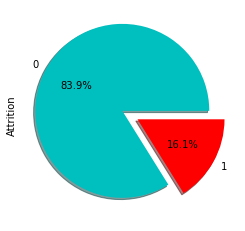

In [33]:
# we will do encoding on our target variable:
# 1 ---> 'Yes'
# 0 ---> 'No'
df['Attrition'].replace("No" , 0 , inplace = True)
df['Attrition'].replace("Yes" , 1 , inplace = True)
df['Attrition'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['c','r'])
print(df['Attrition'].value_counts())

In [34]:
# from the above piechart, we can see that only 16.1% of the employees have left the company, that is 237 out of 1470 total employee count.
# As we said before our target is imbalanced, This could raise an instrinc issue of the dataset since it is clearly biased towards employees who opt to stay at the company

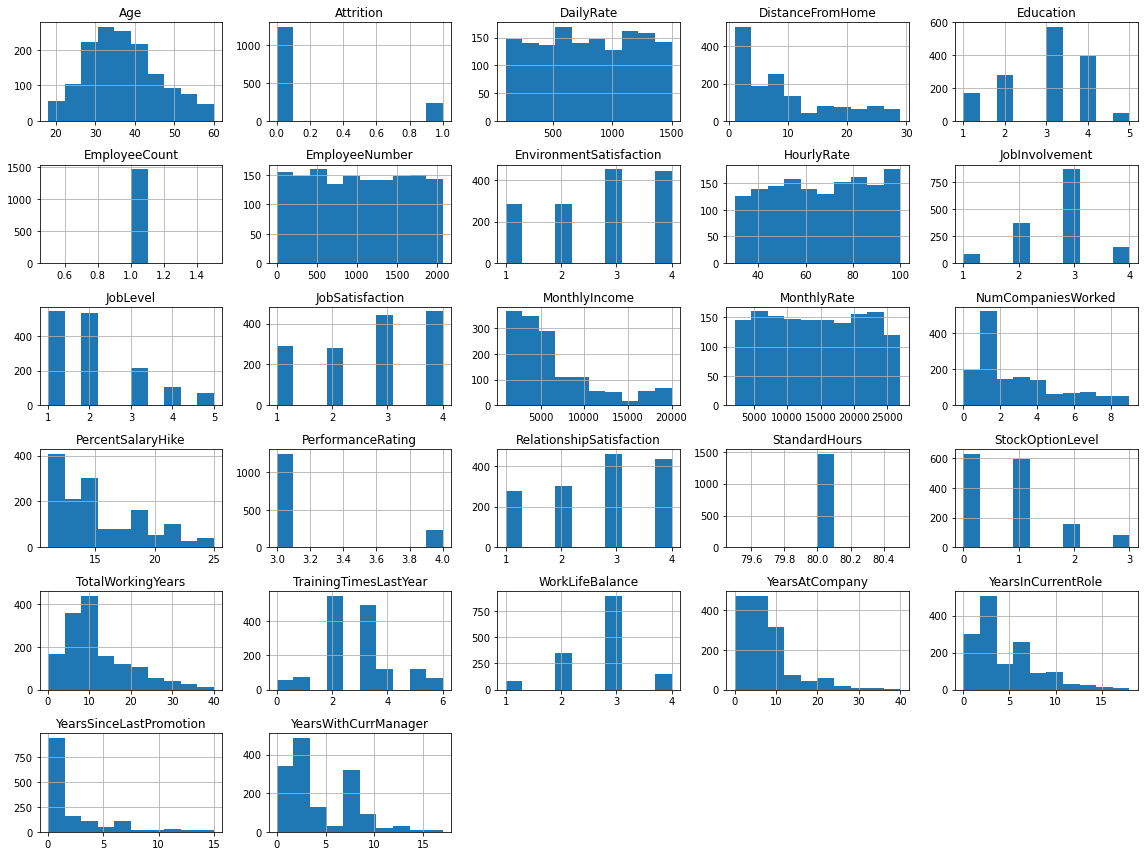

In [35]:
# Let's see the distrubtion of all numeric variables
df.hist(figsize=(16,12))
plt.tight_layout()

In [36]:
# columns:'EmployeeCount' , 'Over18' , 'StandardHours' are of no value because these remain the same for all employees, so we will not consider them in our analysis. We can drop them in preprocessing part.

<AxesSubplot:>

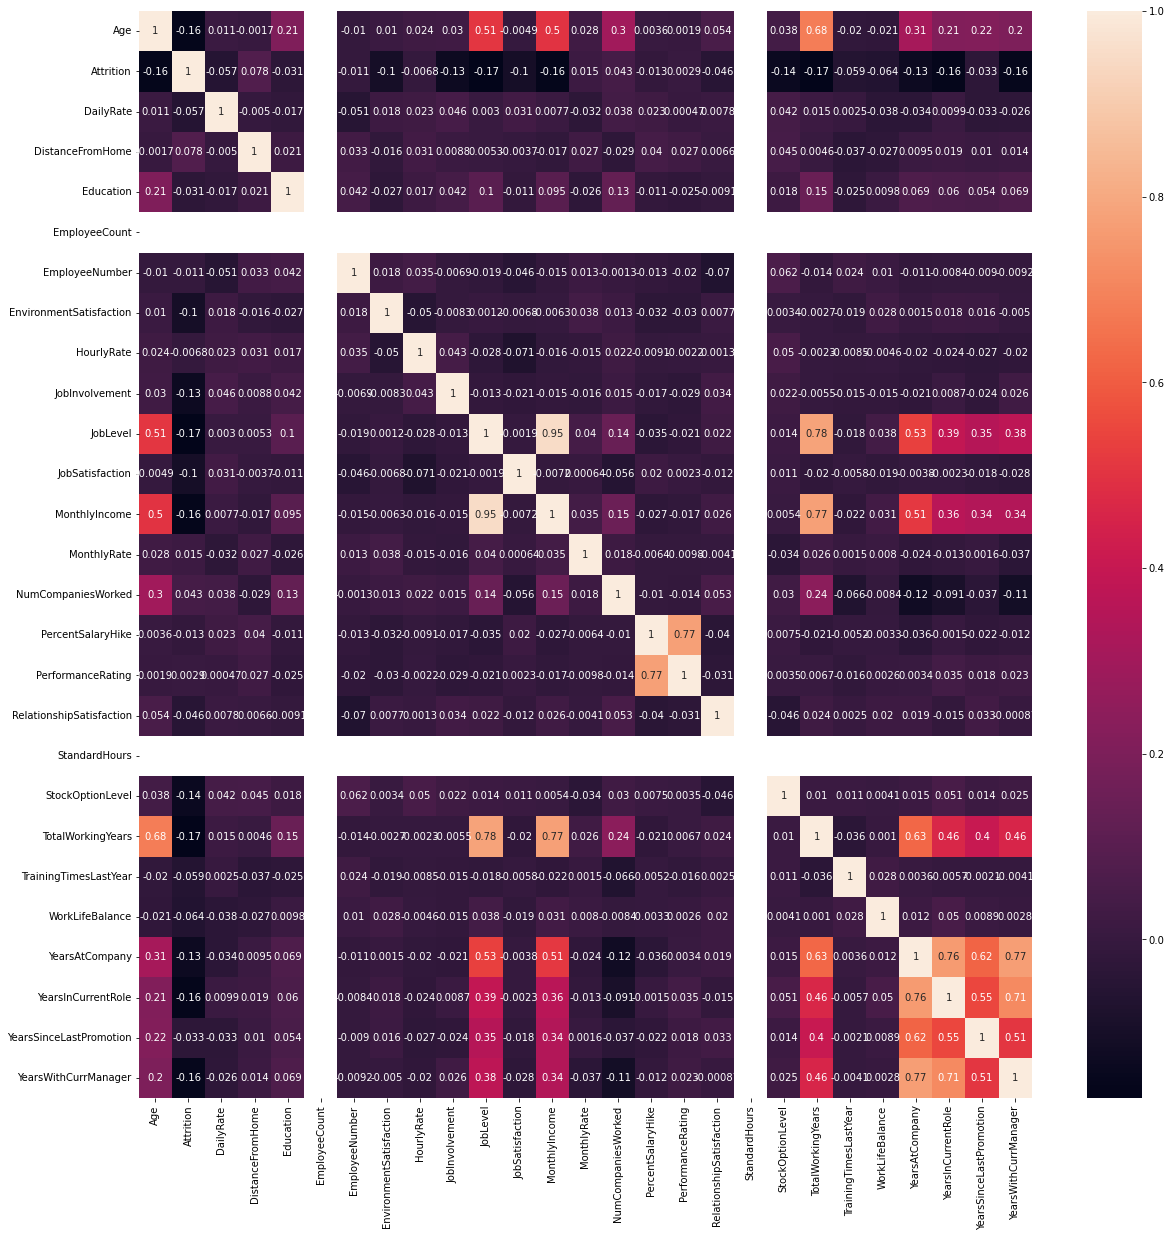

In [38]:
# let's see the correlation between the features
plt.subplots(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True)

In [39]:
# TotalWorkingYears' is strongly correlated with 'JobLevel' and 'MonthlyIncome'. In general, we can see quite a lot of variables are poorly correlated.
# It is desirable to train a predictive model with features that are not highly correlated with each other

In [40]:
# now we can see the visualise the effect on out target variables from our features

In [41]:
# Analysing the ratio between males and females and effect of gender on attrition

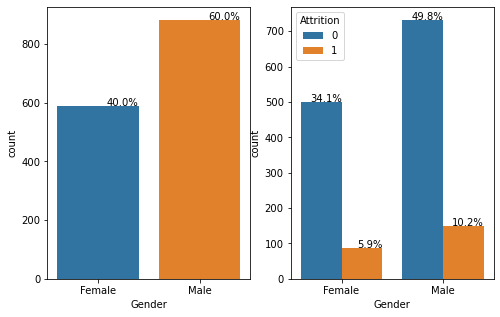

In [43]:
plt.figure(figsize=(8,5))
total = float(len(df))
plt.subplot(1,2,1)
ay=sns.countplot(x="Gender",data=df)
for p in ay.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ay.annotate(percentage, (x, y),ha='right')
plt.subplot(1,2,2)
ax = sns.countplot(x="Gender", hue="Attrition", data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

In [44]:
# The ratio between numbers of males and females is 1.5.
# Approximately 6% females and 10% males has left the company.
# The number of males which are likely to leave the firm more than number of female.

In [45]:
# distribution of age and effect of age on attrition

<AxesSubplot:xlabel='Age', ylabel='Count'>

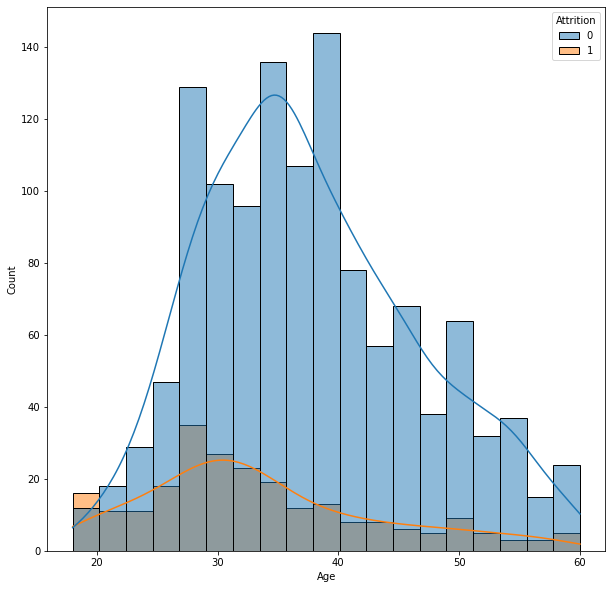

In [46]:
plt.figure(figsize = (10, 10))
sns.histplot(x = 'Age', hue = 'Attrition', data = df ,     kde=True )

In [47]:
# The distribution of the age variable looks almost a bell-curved (Normal Distribution) where the median/mean are closely equal around the center.
# The majority of employee are between 28 - 36 years old, while the range of age are 18 - 60.
# the Company seems to be highly depended on segment of employees younger than 40 years old.
# we can identify a close pattern where younger employees had higher chance of attrition up to around 35.

In [48]:
# distribution of the distance from home and effect of the distance from home on attrition

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

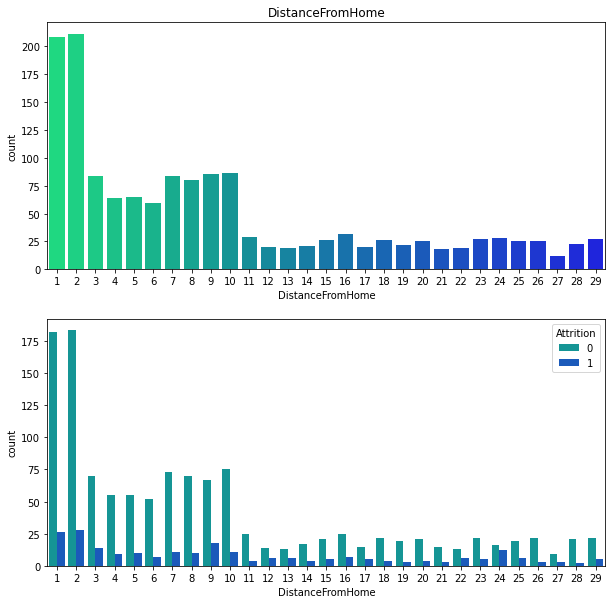

In [49]:
plt.figure(figsize = (10 , 10))
plt.subplot(2 ,1,1)
sns.countplot(x= 'DistanceFromHome' ,data =df ,palette='winter_r')
plt.title('DistanceFromHome')
plt.subplot(2,1,2)
sns.countplot(x= 'DistanceFromHome' ,data = df ,palette='winter_r'  ,hue =df['Attrition'])

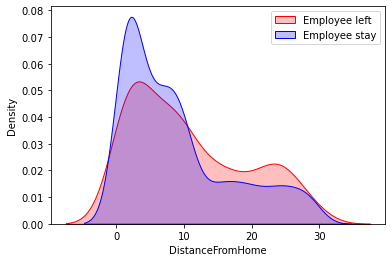

In [50]:
df_left=df[df[ 'Attrition']==1]['DistanceFromHome'] 
df_stay=df[df[ 'Attrition']==0]['DistanceFromHome'] 

sns.kdeplot(df_left, label = 'Employee left', shade = True, color = 'r' )
sns.kdeplot(df_stay, label = 'Employee stay', shade = True, color = 'b')
plt.legend()
plt.show()

In [51]:
# the most of our employees have a distance from home in range(1-10 km)
# we can notice that more employees tend to leave when the distance from home is more than 10 km

In [52]:
# effect of education on attrition 

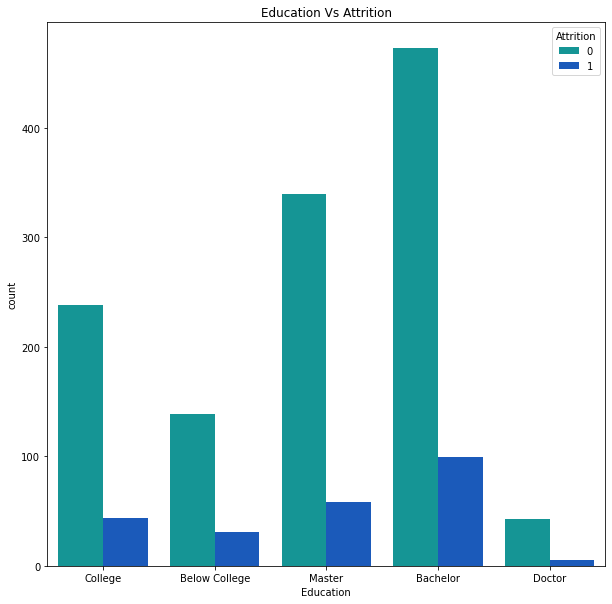

In [53]:
plt.figure(figsize=(10,10))
df['Education'] = df['Education'].replace([1,2,3,4,5],['Below College','College', 'Bachelor', 'Master', 'Doctor'])
sns.countplot(x= 'Education' ,data =df ,palette='winter_r',hue='Attrition')
plt.title('Education Vs Attrition')
plt.show()

In [54]:
# the employee of Bachelor degree tends to leave company than the people have any other degrees.

In [55]:
# effect of education level on attrition

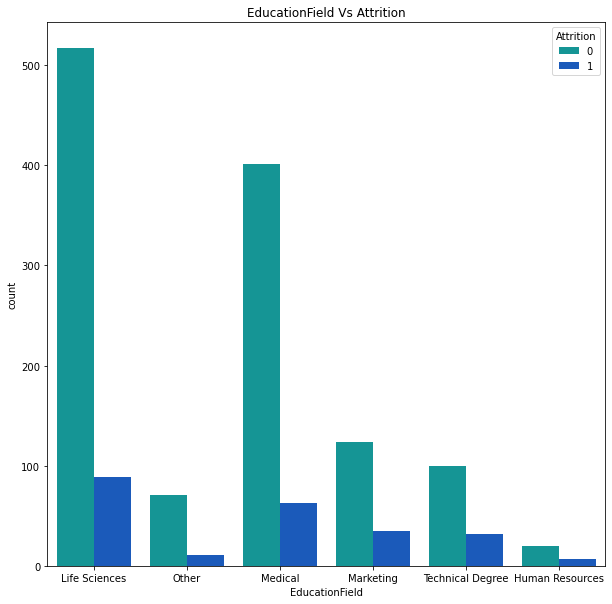

In [56]:
plt.figure(figsize=(10,10))
sns.countplot(x= 'EducationField' ,data =df ,palette='winter_r',hue='Attrition')
plt.title('EducationField Vs Attrition')
plt.show()

In [57]:
# Employees majored into the education field Life Sciences had the highest precentage of attrition, followed by Medical and Marketing.

In [58]:
# effect of MaritalStatus on attrition 

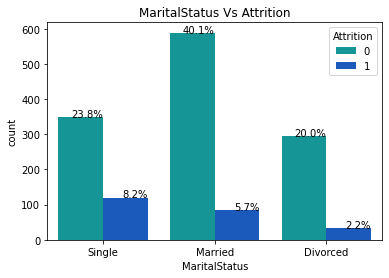

In [59]:
a=sns.countplot(x= 'MaritalStatus' ,data =df ,palette='winter_r',hue='Attrition')
plt.title('MaritalStatus Vs Attrition')
for p in a.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    a.annotate(percentage, (x, y),ha='right')

plt.show()

In [60]:
# The employee whose status labeled single have clear indication to leave the company, while the others who are married tend to be stable

In [61]:
# effect of department on attrition

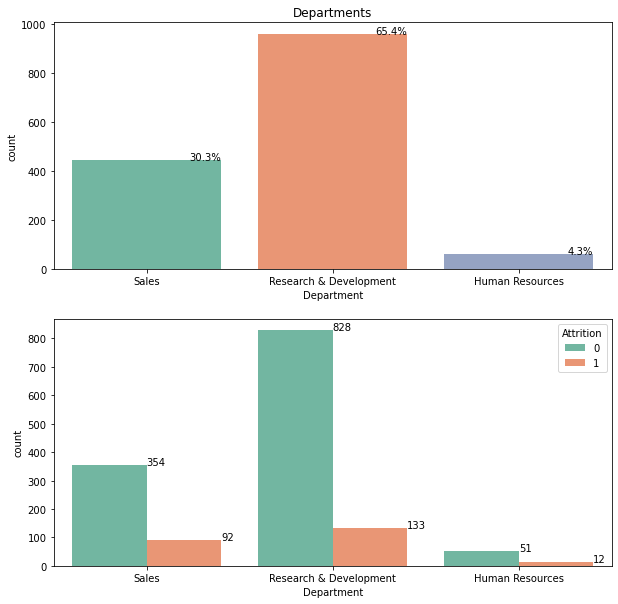

In [62]:
plt.figure(figsize = (10 , 10))
plt.subplot(2 ,1,1)
q=sns.countplot(x= 'Department' ,data = df ,palette='Set2',)
plt.title('Departments')
for p in q.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    q.annotate(percentage, (x, y),ha='right')
plt.subplot(2,1,2)
u=sns.countplot(x= 'Department' ,data = df ,palette='Set2'  ,hue =df['Attrition'])
for p in u.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    #u.annotate(percentage, (x, y),ha='left')
    u.annotate(y,(x,y),ha='left')
plt.show()


In [63]:
# The ratio of Attrition in Sales Dept. is 20%(i.e 92 out of 446), the highest among other departments, which is greater than R&D Dept 13%(133/961), by 7% .
# There are three Deptments: R&D, Sales and HR

In [64]:
# effect of job role on attrition

<AxesSubplot:xlabel='count', ylabel='JobRole'>

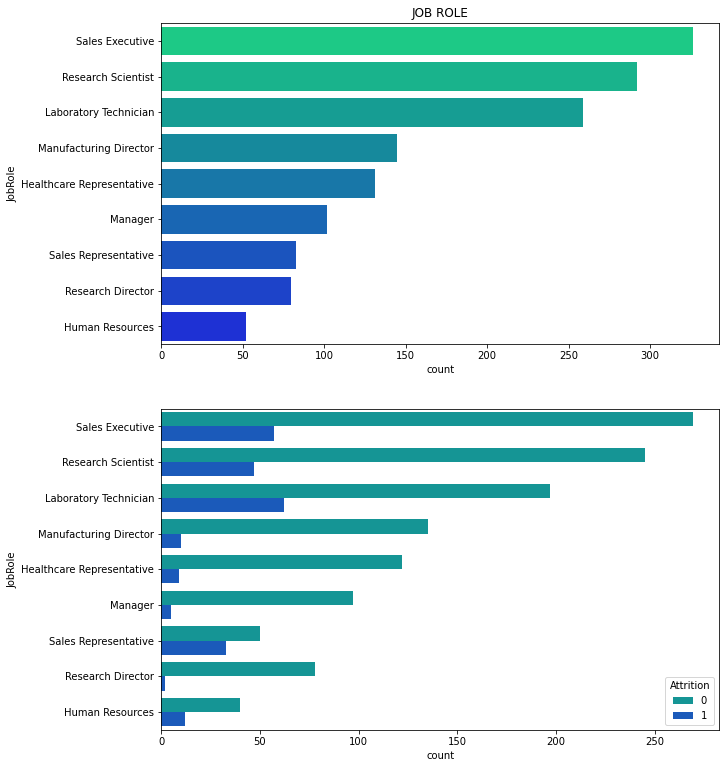

In [65]:
plt.figure(figsize = (10 , 13))
plt.subplot(2 ,1,1)
sns.countplot(y= 'JobRole' ,data =df ,palette='winter_r')
plt.title('JOB ROLE')
plt.subplot(2,1,2)
sns.countplot(y= 'JobRole' ,data = df ,palette='winter_r'  ,hue =df['Attrition'])

In [66]:
# we can see that ‘sales executive’, ‘sales representative’, and ‘lab technician’ are more likely to leave compared to other roles.

In [67]:
# effect of OverTime on attrition

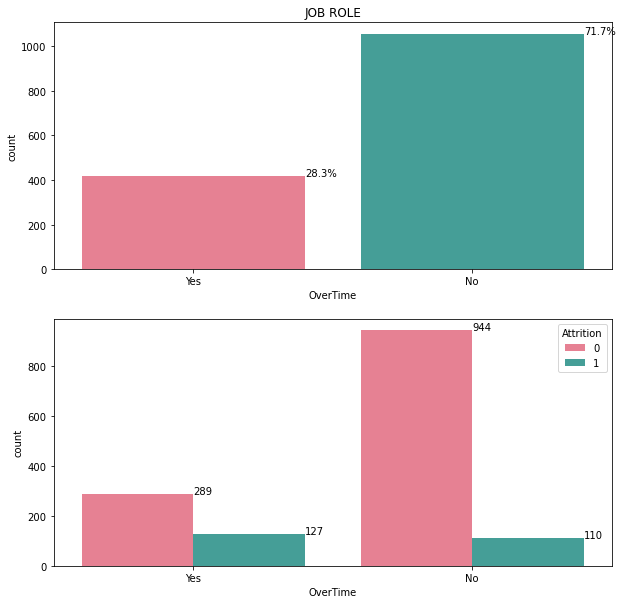

In [68]:
plt.figure(figsize = (10 , 10))
plt.subplot(2 ,1,1)
a=sns.countplot(x= 'OverTime' ,data =df ,palette='husl')
plt.title('JOB ROLE')
plt.subplot(2,1,2)
b=sns.countplot(x= 'OverTime' ,data = df ,palette='husl'  ,hue =df['Attrition'])
for p in a.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    a.annotate(percentage, (x, y),ha='left')
    #a.annotate(y,(x,y),ha='left')
for p in b.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    #b.annotate(percentage, (x, y),ha='left')
    b.annotate(y,(x,y),ha='left')
plt.show()

In [69]:
# we can see that about 75% of employees who stayed at the company were not required to do overtime, on the other side, the vast majority of attrited employees were actually asked to do overtime
# stress and job pressures might be the reason for them to leave the company.
# The ratio of Attrition in people working overtime is 30%(i.e 127 out of 416), which is greater than people not working overtime 10%(i.e 110 out of 1054), by 20% .

In [70]:
# effect of BusinessTravel on attrition

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


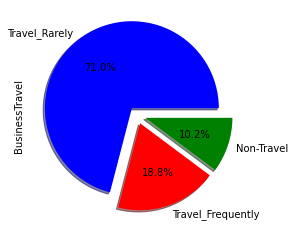

In [71]:
df['BusinessTravel'].value_counts().plot(kind='pie',explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['b','r','g'])
print(df['BusinessTravel'].value_counts())

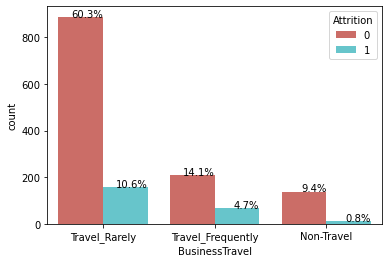

In [72]:
b=sns.countplot(x= 'BusinessTravel' ,data = df ,palette='hls'  ,hue =df['Attrition'])
for p in b.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    b.annotate(percentage, (x, y),ha='right')
    #b.annotate(y,(x,y),ha='left')
plt.show()

In [73]:
# we can see that employees who travelled rarely had the highest attrition level, whereas the employees who were not required to travel had the least chance of attrition.

In [74]:
#  effect of JobInvolvement on attrition

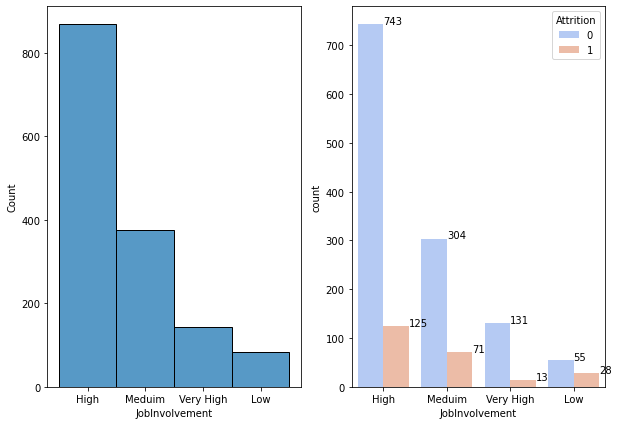

In [76]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
df['JobInvolvement'] = df['JobInvolvement'].replace([1,2,3,4],['Low','Meduim', 'High', 'Very High'])
a=sns.histplot(x= 'JobInvolvement' ,data = df ,palette='coolwarm'  )

plt.subplot(1,2,2)
b=sns.countplot(x= 'JobInvolvement' ,data = df ,palette='coolwarm'  ,hue =df['Attrition'])
for p in b.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    #b.annotate(percentage, (x, y),ha='right')
    b.annotate(y,(x,y),ha='left')
plt.show()

In [77]:
# Most of the employees considered their involvement with their jobs as High.

# The ratio of Attrition of the employees considered their involvement with their jobs as medium is (19%), which is greater than High involvement(14%), by 5% .

In [78]:
# distribution of PerformanceRating

3    1244
4     226
Name: PerformanceRating, dtype: int64


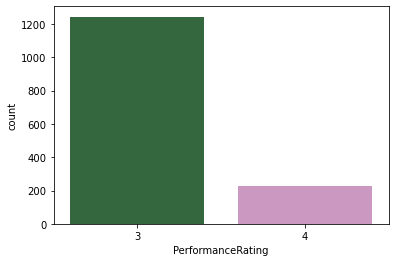

In [79]:
print(df['PerformanceRating'].value_counts())
sns.countplot(x= 'PerformanceRating' ,data = df ,palette='cubehelix')
plt.show()

In [80]:
# The performance rating for the employees have been very good

In [81]:
# distribution of StockOptionLevel 

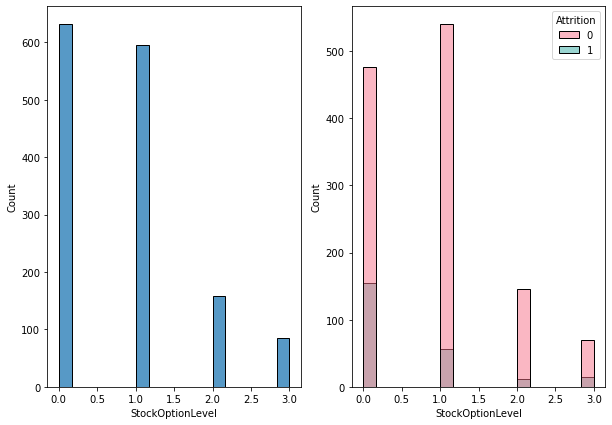

In [82]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.histplot(x= 'StockOptionLevel' ,data = df ,palette='husl'  )
plt.subplot(1,2,2)
sns.histplot(x= 'StockOptionLevel' ,data = df ,palette='husl'  ,hue='Attrition')
plt.show()

In [83]:
# Stock Option Level: Larger proportions of levels 0 & 1 quit.

In [84]:
# effect of Work-Life Balance, Job Satisfaction, Relationship Satisfaction, Enviroment Satisfaction on attrition 

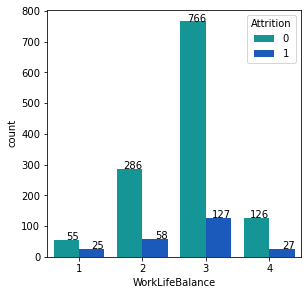

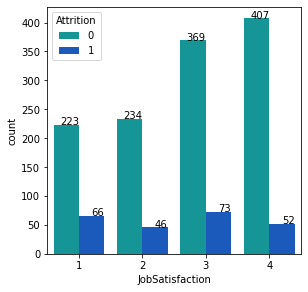

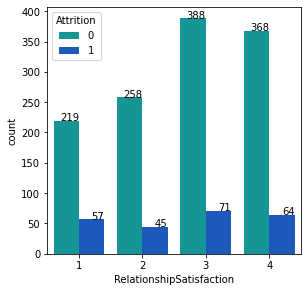

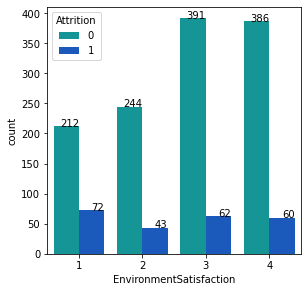

In [86]:
df_4=df[['WorkLifeBalance','JobSatisfaction','RelationshipSatisfaction','EnvironmentSatisfaction']]
for i,col in enumerate(df_4.columns):
    plt.figure(figsize = (10 , 10))
    plt.subplot(2 ,2,i+1)
    b=sns.countplot(x= col ,data = df ,palette='winter_r',hue =df['Attrition'])
    for p in b.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        #b.annotate(percentage, (x, y),ha='right')
        b.annotate(y,(x,y),ha='right')

In [87]:
# For the employees who didn't leave the organisation, the Job, Relationship, Environment satisfaction where largely above 3
# For the employees who left the organisation, the Job, Relationship and Environment satisfaction where largely below 3
# For the most employees have Work-Life Balance, Job Statification where largely above 3
# For the most who left the organisation, whose overall work-life balance in level 1

In [88]:
# effect of YearsWithCurrManager on attrition 

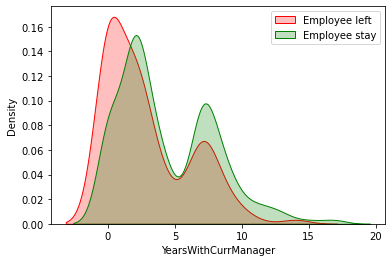

In [89]:
df_left=df[df[ 'Attrition']==1]['YearsWithCurrManager'] 
df_stay=df[df[ 'Attrition']==0]['YearsWithCurrManager'] 

sns.kdeplot(df_left, label = 'Employee left', shade = True, color = 'r' )
sns.kdeplot(df_stay, label = 'Employee stay', shade = True, color = 'g')
plt.legend()
plt.show()

In [90]:
# we can see more employees tend to leave with less than 2 years with the current managers and tend to stay if having more than 5 years experience

In [91]:
#  effect of TotalWorkingYears, YearsInCurrentRole, YearsAtCompany, TrainingTimesLastYear on attrition

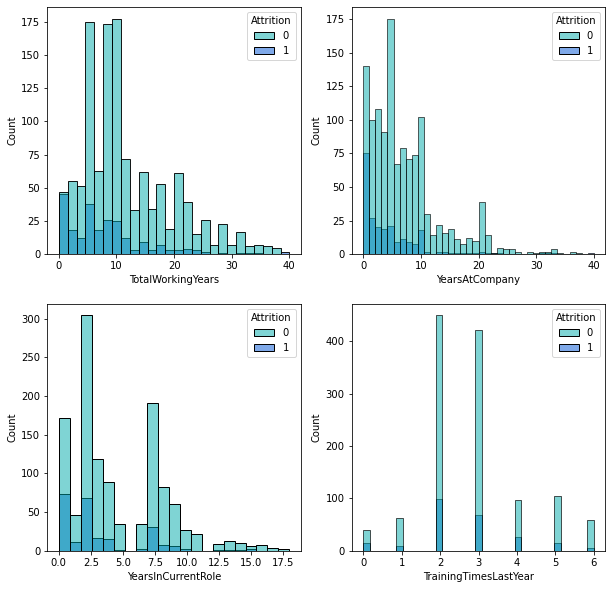

In [92]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(x= 'TotalWorkingYears' ,data =df ,palette='winter_r',hue='Attrition')
plt.subplot(2,2,2)
sns.histplot(x= 'YearsAtCompany' ,data =df ,palette='winter_r',hue='Attrition')
plt.subplot(2,2,3)
sns.histplot(x= 'YearsInCurrentRole' ,data =df ,palette='winter_r',hue='Attrition')
plt.subplot(2,2,4)
sns.histplot(x= 'TrainingTimesLastYear' ,data =df ,palette='winter_r',hue='Attrition')
plt.show()

In [93]:
# we can see more employees tend to leave with less than 7 years of experience
# we can see more employees tend to leave with less than 5 years in the company
# we can see more employees tend to leave with less than 2 years in the current role

In [94]:
# analysing distribution Years since last poromtions

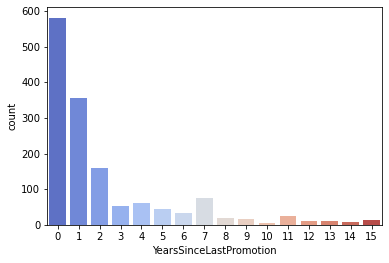

In [95]:
b=sns.countplot(x= 'YearsSinceLastPromotion' ,data = df ,palette='coolwarm'  )
plt.show()

In [96]:
# we can see the majority of employees with last poromtion since 2 years
# we can see outliers, there are emploees with 15 years working in the company without any poromtion

In [97]:
# effect of NumCompaniesWorked on attrition

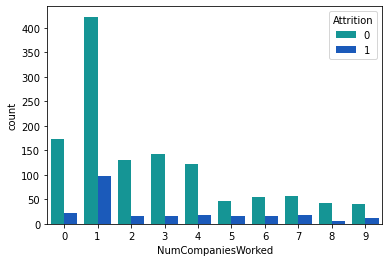

In [98]:
sns.countplot(x= 'NumCompaniesWorked' ,data =df ,palette='winter_r',hue='Attrition')

plt.show()

In [99]:
# we can see that employees with 1 year of experience as it is majorly contributing to the attrition %

In [100]:
# effect of MonthlyIncome on attrition

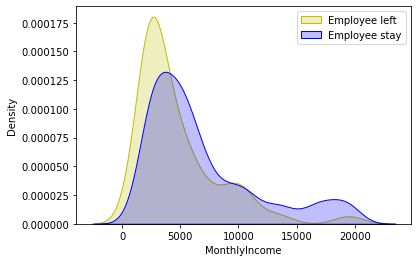

In [101]:
df_left=df[df[ 'Attrition']==1]['MonthlyIncome'] 
df_stay=df[df[ 'Attrition']==0]['MonthlyIncome'] 

sns.kdeplot(df_left, label = 'Employee left', shade = True, color = 'y' )
sns.kdeplot(df_stay, label = 'Employee stay', shade = True, color = 'b')
plt.legend()
plt.show()

In [102]:
# A large majority of low monthly income tends to leave than the group of high monthly income

In [103]:
# Analysing relation between education and monthlyIncome

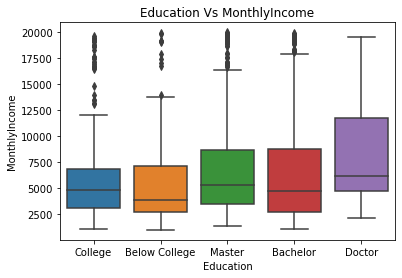

In [104]:
plt.title('Education Vs MonthlyIncome')
sns.boxplot(x=df['Education'],y=df['MonthlyIncome'])
plt.show()

In [105]:
# As the level of education increases , average monthly income increases

In [106]:
# Analysing relation between the MonthlyIncome and Gender

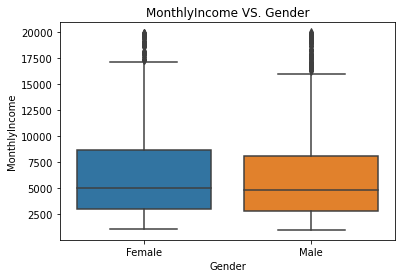

In [107]:
plt.title('MonthlyIncome VS. Gender')
sns.boxplot(x=df['Gender'],y=df['MonthlyIncome'])
plt.show()

In [108]:
# As shown female and male monthly income shows a similar variability with similar mean, median, 75%, and 25% quartile values

In [109]:
# Analysing relation between the MonthlyIncome and JobRole

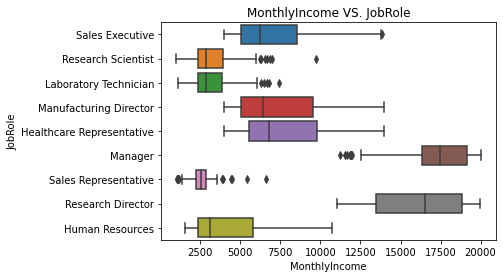

In [110]:
plt.title('MonthlyIncome VS. JobRole')
sns.boxplot(y=df['JobRole'],x=df['MonthlyIncome'])
plt.show()

In [111]:
# we found ‘Sales Representative’ shows a compact distribution, with monthly income broadly lower than other roles ):
# This could explain why ‘Sales Representative’ tends to leave more other roles

In [112]:
# Analysing relation between the MonthlyIncome and TotalWorkingYears

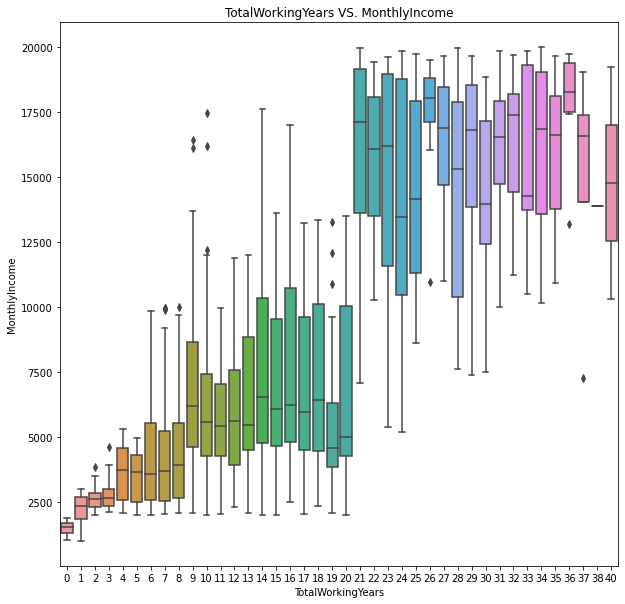

In [113]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df['TotalWorkingYears'],y=df['MonthlyIncome'])
plt.title('TotalWorkingYears VS. MonthlyIncome')
plt.show()


In [114]:
# there is a drop in income for Employees having 15 years of Experience in the company

In [115]:
# Analysing  relation between YearsInCurrentRole and MonthlyIncome 

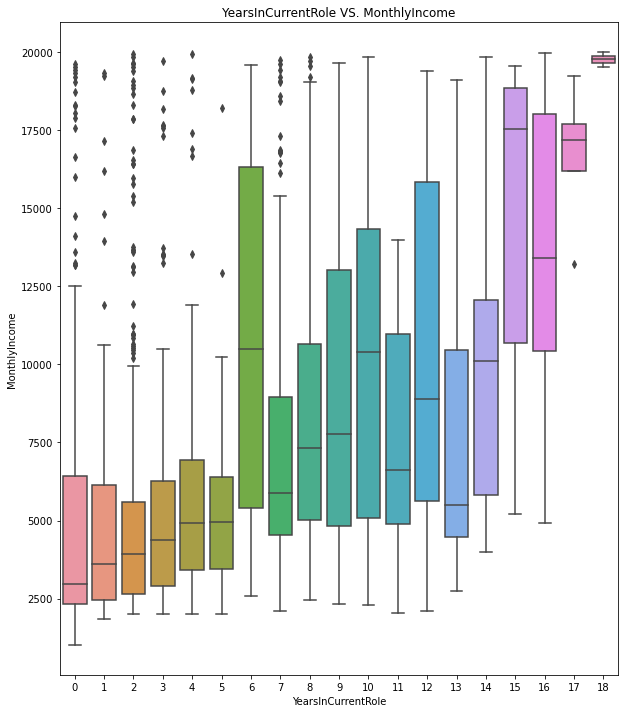

In [116]:
plt.figure(figsize=(10,12))
sns.boxplot(x=df['YearsInCurrentRole'],y=df['MonthlyIncome'])
plt.title('YearsInCurrentRole VS. MonthlyIncome')
plt.show()

In [117]:
# we can see that Employee with 6 years in Current Role is earning more than an employee carrying 14 years in Current Role 

In [118]:
# Analysing relation between MaritalStatus and MonthlyIncome

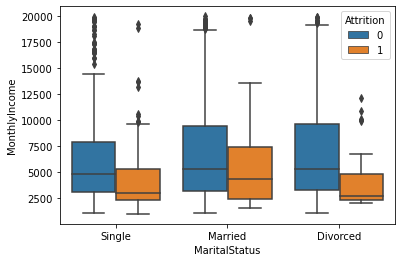

In [119]:
sns.boxplot(x=df['MaritalStatus'],y=df['MonthlyIncome'],hue=df['Attrition'])
plt.show()

In [120]:
# we can see single employees have low MonthlyIncome compared by other, so that's why they leave more.

In [121]:
# Analysing relation between Age and JobInvolvement

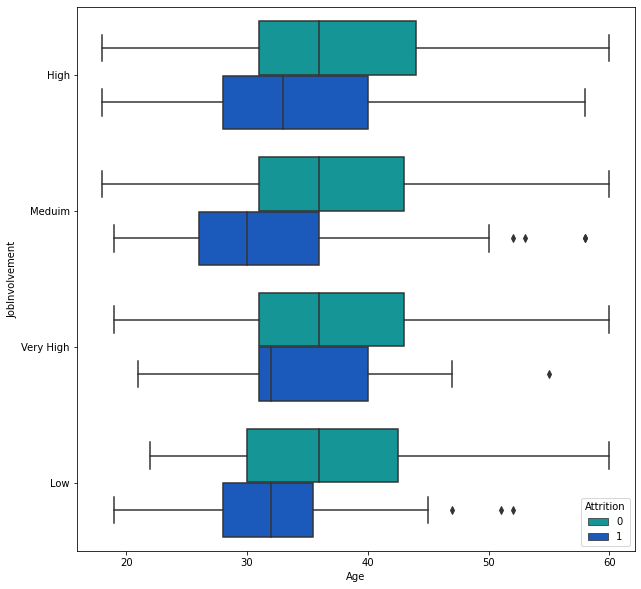

In [122]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df['Age'],y=df['JobInvolvement'],hue=df['Attrition'],palette='winter_r')
plt.show()

In [123]:
# Employees with Low job involvement tend to be younger than other groups.
# this could be related to the usual obstacles when new employees join a company as it takes time to be accustomed within the company’s culture

In [124]:
# Analysing relation between MaritalStatus and DistanceFromHome 

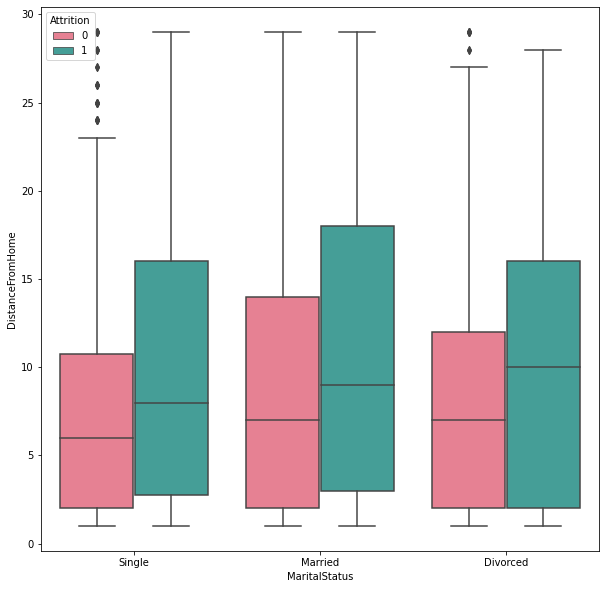

In [125]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df['MaritalStatus'],y=df['DistanceFromHome'],hue=df['Attrition'],palette='husl')
plt.show()

In [126]:
# distance from home could positively correlate with higher attrition level.
# We can see the median of attrited employees had to commute longer than those who stayed alongside their marital status.

In [127]:
# Analysing relation between Work-Life Balance & Distance From Home

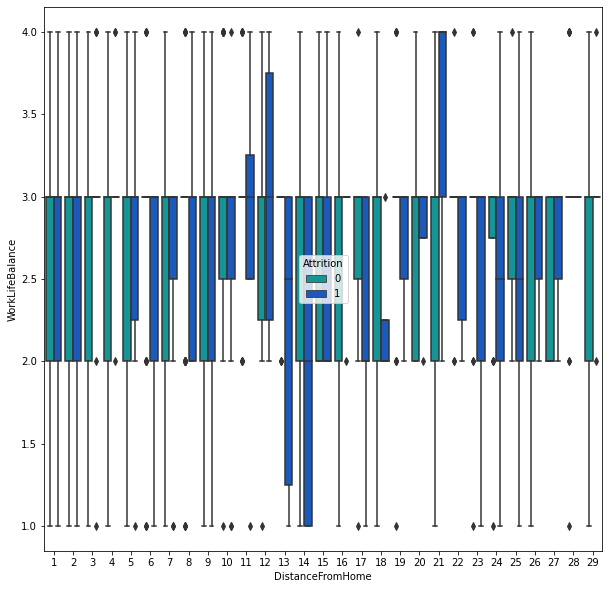

In [129]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df['DistanceFromHome'],y=df['WorkLifeBalance'],hue=df['Attrition'],palette='winter_r')
plt.show()

In [130]:
# Those who rated their work-life balance relatively low were commuting from farther away in comparison with those who rated their work-life balance as perfect.

In [ ]:
# Key observations:
#Males have a higher rate of attrition.
#Females are earning a little higher than males.
#Employee with 6 years in Current Role is earning more than an employee carrying 14 years in Current Role.
#Young professionals are more likely to leave the firm.
#Sales Representative tends to leave more other roles because they have lower income compared with other roles.
#As the level of education increases , average monthly income increases.
#More employees tend to leave when the distance from home is more than 10 km.
#Single employees tends to leave because they have low MonthlyIncome compared by other.
#An innovative structure needs to be implemented for employees with 1 year of experience as it is majorly contributing to the attrition %
#Drop in income for Employees having 15 years of Experience in the company.
#Need to come up with better stock options for people with more than 6+ years in Current Role as attrition seems to increase gradually with a drop in monthly income.
#Employees are dissatisfied with the environment conditions and JobSatisfaction tend to leave more compared with other.

# To avoid attrition, the company have to:
# 1. Fairly pay employees at the same job level , same job involvement , same job role with almost equal monthly income and stocks . 
# 2. Offer stock options to more employees especially new recruits as an incentive . 
# 3. Increase allowance for employees to work overtime , and make sure that those working overtime are being paid more than those who are not. 
# 4. companies should remember to appreciate their employees and work on the harmonic balance of their company.
# we have seen strong features that could determine employees' attrition such as (Over Time, Distance From Home, Years Since Last Promotion)

In [131]:
# Preprocessing the data 
# In the dataset there are 4 irrelevant columns, i.e:EmployeeCount, EmployeeNumber, Over18 and StandardHour. 
# So, we have to remove first numerical columns for more accuracy. 

In [170]:
df = df.drop('EmployeeCount', axis=1) # removing EmployeeCount from numerical columns
df = df.drop('StandardHours', axis=1)
print(df.shape)

(1470, 33)


In [133]:
# preparing Input and Output data  

In [171]:
categorical_cols = [feature for feature in df.columns if df[feature].dtype=='object']
df[categorical_cols].sample(5)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
1190,No,Travel_Rarely,Research & Development,Medical,Male,Research Scientist,Divorced,Y,No
947,Yes,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Single,Y,Yes
698,No,Travel_Rarely,Sales,Medical,Female,Sales Executive,Married,Y,No
263,No,Travel_Rarely,Sales,Technical Degree,Female,Manager,Married,Y,Yes
26,Yes,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Single,Y,Yes


In [172]:
cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
df = pd.get_dummies(df, columns=cols, drop_first=True)

In [173]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [207]:
cols = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

scaler = StandardScaler()
for col in cols:
    X_train[col] = scaler.fit_transform(X_train[col].values.reshape(-1 ,1))
    X_test[col] = scaler.fit_transform(X_test[col].values.reshape(-1 ,1))

In [208]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 40)

In [195]:
#Model Execution: 

# Using KNeighborsClassifier for finding the best number of neighbour with the help of misclassification error.

The optimal number of neighbors is  19 


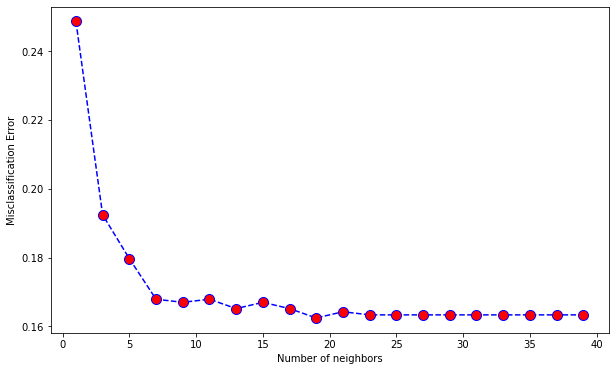

In [209]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = []
cv_scores = []
   
from sklearn.model_selection import cross_val_score
# perform 10 fold cross validation
for k in range(1, 40, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(
        knn, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())
error_rate = [1-x for x in cv_scores]
   
# determining the best k
optimal_k = neighbors[error_rate.index(min(error_rate))]
print('The optimal number of neighbors is % d ' % optimal_k)
   
# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(range(1, 40, 2), error_rate, color ='blue', linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()

In [198]:
#Prediction Score

In [210]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
 
def print_score(clf, X_train, y_train, X_test, y_test, train = True):
    if train:
        print("Train Result:")
        print("------------")
        print("Classification Report: \n {}\n".format(classification_report(
                y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(
                y_train, clf.predict(X_train))))
 
        res = cross_val_score(clf, X_train, y_train,
                              cv = 10, scoring ='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        print("accuracy score: {0:.4f}\n".format(accuracy_score(
                y_train, clf.predict(X_train))))
        print("----------------------------------------------------------")
                
    elif train == False:
        print("Test Result:")
        print("-----------")
        print("Classification Report: \n {}\n".format(
                classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(
                confusion_matrix(y_test, clf.predict(X_test))))
        print("accuracy score: {0:.4f}\n".format(
                accuracy_score(y_test, clf.predict(X_test))))
        print("-----------------------------------------------------------")
         
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
print_score(knn, X_train, y_train, X_test, y_test, train = True)
print_score(knn, X_train, y_train, X_test, y_test, train = False)

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

          No       0.86      0.99      0.92       922
         Yes       0.76      0.14      0.23       180

    accuracy                           0.85      1102
   macro avg       0.81      0.57      0.58      1102
weighted avg       0.84      0.85      0.81      1102


Confusion Matrix: 
 [[914   8]
 [155  25]]

Average Accuracy: 	 0.8321
Accuracy SD: 		 0.0149
accuracy score: 0.8521

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

          No       0.85      0.96      0.90       311
         Yes       0.29      0.09      0.14        57

    accuracy                           0.83       368
   macro avg       0.57      0.52      0.52       368
weighted avg       0.77      0.83      0.78       368


Confusion Matrix: 
 [[299  12]
 [ 52   5]]

accuracy score: 0.826

In [200]:
#  Random forest classifier

In [202]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
  
rf = RandomForestClassifier(n_estimators=10,
                            criterion='entropy')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
  
def print_score(clf, X_train, y_train,
                X_test, y_test,
                train=True):
  
    if train:
        print("Train Result:")
        print("------------")
        print("Classification Report: \n {}\n".format(classification_report(
            y_train, clf.predict(X_train))))
  
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(
            y_train, clf.predict(X_train))))
  
        res = cross_val_score(clf, X_train, y_train,
                              cv=10, scoring='accuracy')
  
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        print("----------------------------------------------------------")
  
    elif train == False:
  
        print("Test Result:")
        print("-----------")
        print("Classification Report: \n {}\n".format(
            classification_report(y_test, clf.predict(X_test))))
  
        print("Confusion Matrix: \n {}\n".format(
            confusion_matrix(y_test, clf.predict(X_test))))
  
        print("accuracy score: {0:.4f}\n".format(
            accuracy_score(y_test, clf.predict(X_test))))
  
        print("-----------------------------------------------------------")
  
print_score(rf, X_train, y_train,
            X_test, y_test,
            train=True)
  
print_score(rf, X_train, y_train,
            X_test, y_test,
            train=False)

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

          No       0.98      1.00      0.99       922
         Yes       1.00      0.88      0.94       180

    accuracy                           0.98      1102
   macro avg       0.99      0.94      0.96      1102
weighted avg       0.98      0.98      0.98      1102


Confusion Matrix: 
 [[922   0]
 [ 21 159]]

Average Accuracy: 	 0.8439
Accuracy SD: 		 0.0119
----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

          No       0.87      0.98      0.92       311
         Yes       0.69      0.19      0.30        57

    accuracy                           0.86       368
   macro avg       0.78      0.59      0.61       368
weighted avg       0.84      0.86      0.83       368


Confusion Matrix: 
 [[306   5]
 [ 46  11]]

accuracy score: 0.8614

---------------------

In [211]:
# we have seen the Attrition prediction through KNeighborsClassifier model and  Random forest classifier model and find both models suitable

In [212]:
# conclusion:
# To avoid attrition, the company have to:
# 1. Fairly pay employees at the same job level , same job involvement , same job role with almost equal monthly income and stocks . 
# 2. Offer stock options to more employees especially new recruits as an incentive . 
# 3. Increase allowance for employees to work overtime , and make sure that those working overtime are being paid more than those who are not. 
# 4. companies should remember to appreciate their employees and work on the harmonic balance of their company.
# we have seen strong features that could determine employees' attrition such as (Over Time, Distance From Home, Years Since Last Promotion)


In [213]:
# Save the model

In [214]:
import joblib
joblib.dump(rf,"HR_Analytics_Project.pkl")

['HR_Analytics_Project.pkl']